In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf','svg')
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [3]:
data = pd.read_csv('D:\\study\\Tum\\QoE\\subject_data\\one.csv')
data 

,Worker ID,Finished,Begin,Unnamed: 3,End,Unnamed: 5,Step 1,Step 2,Unnamed: 8,Unnamed: 9,...,Step 25,Unnamed: 93,Unnamed: 94,Step 26,Unnamed: 96,Unnamed: 97,Step 27,Unnamed: 99,Unnamed: 100,Step Order
0,NaN,NaN,Date,Time,Date,Time,Duration,Duration,Results,NaN,...,Duration,Results,NaN,Duration,Results,NaN,Duration,Results,NaN,NaN
1,A0017268R9SKD8U2Y3F,Yes,02.07.2018,08:16:43,02.07.2018,08:23:27,5,13,Female,1.0,...,12,Excellent,5.0,13,Bad,1.0,13,Poor,2.0,1 2 3 4 5 8 7 6 9 24 25 26 15 14 21 20 18 12 2...
2,A147F5PJTHOB8A,No,02.07.2018,08:23:59,02.07.2018,08:24:04,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 2 3 4 8 7 6 5 9 10 27 20 26 15 11 17 22 25 1...
3,A16TP8YGKE1FJ5,Yes,02.07.2018,08:41:03,02.07.2018,08:48:18,8,14,Male,2.0,...,13,Excellent,5.0,12,Good,4.0,20,Excellent,5.0,1 2 3 4 7 5 8 6 9 13 23 18 21 17 12 19 10 16 2...
4,A183WYXN12P2TJ,Yes,02.07.2018,08:18:35,02.07.2018,08:24:25,4,8,Male,2.0,...,19,Good,4.0,10,Excellent,5.0,18,Good,4.0,1 2 3 4 8 6 5 7 9 20 19 24 21 22 25 26 12 11 1...
5,A187VXD4ETY6M2,Yes,02.07.2018,08:16:25,02.07.2018,08:24:05,7,10,Female,1.0,...,15,Good,4.0,11,Poor,2.0,11,Bad,1.0,1 2 3 4 7 8 5 6 9 23 20 15 25 14 19 24 18 16 2...
6,A18SXC3JEN1O0U,Yes,02.07.2018,08:13:21,02.07.2018,08:20:29,6,20,Male,2.0,...,13,Excellent,5.0,18,Fair,3.0,15,Good,4.0,1 2 3 4 8 5 6 7 9 25 19 11 16 22 15 14 20 21 2...
7,A18XFOKU5G1OL1,No,02.07.2018,08:36:03,02.07.2018,08:42:17,5,10,Male,2.0,...,16,Excellent,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1 2 3 4 7 8 5 6 9 12 25 14 22 26 18 16 11 10 1...
8,A19TL7AJ0FB1JG,Yes,02.07.2018,08:13:29,02.07.2018,08:22:41,5,12,Female,1.0,...,31,Poor,2.0,11,Fair,3.0,11,Excellent,5.0,1 2 3 4 8 6 5 7 9 20 23 15 12 21 22 11 10 17 2...
9,A1BNR1ZAF1QGWG,Yes,02.07.2018,08:23:49,02.07.2018,08:29:36,6,12,Male,2.0,...,13,Good,4.0,12,Poor,2.0,22,Fair,3.0,1 2 3 4 5 6 7 8 9 21 15 23 27 16 13 25 24 14 1...


In [14]:
# read subjective video quality date from excel (1,2,3,4,5 correspoding to good, bad or excellent...)
# read question results
Step_2 = data.iloc[1:,[9,11,13,15]]
Step_3 = data.iloc[1:,[18,20,22,24,26,28,30,32]]
Video_quality = data.iloc[1:,[49]]
Video_quality = np.array(Video_quality)
for i in range(1,18):
    X_raw = data.iloc[1:,[49+i*3]]
    X_data = np.array(X_raw)
    Video_quality = np.concatenate((Video_quality, X_data), axis=1)
Question = np.concatenate((Step_2, Step_3), axis=1)
Video_quality = np.concatenate((Question, Video_quality), axis=1)
Video_quality = np.nan_to_num(Video_quality)
Video_quality.shape

(86, 30)

In [16]:
# remove NAN data 
list = []
for i in range(0,Video_quality.shape[0]):
    if Video_quality[i, 17]== 0:
        list.append(i)
list

Video_quality = np.delete(Video_quality, list, axis=0)
Video_quality[0,:]

array([  1.,   4.,   1.,  10.,   2.,   1.,   3.,   2.,   5.,  13.,   5.,
         2.,   4.,   1.,   5.,   1.,   5.,   1.,   1.,   2.,   2.,   1.,
         2.,   5.,   1.,   2.,   5.,   5.,   1.,   2.])

# Demographics and Streaming Habits
Describe our sample of crowd-workers by presenting the most interesting results from the interview part of the survey. You should use bar plots, histograms, boxplots, pie-charts etc. for visualization. Please keep in mind, that some workers did more than one batch and answered the same survey questions again!

In [31]:
# all demographics and streaming habits data after removed the not finished part
DaSH = Video_quality[:,0:12]
DaSH.shape

(77, 12)

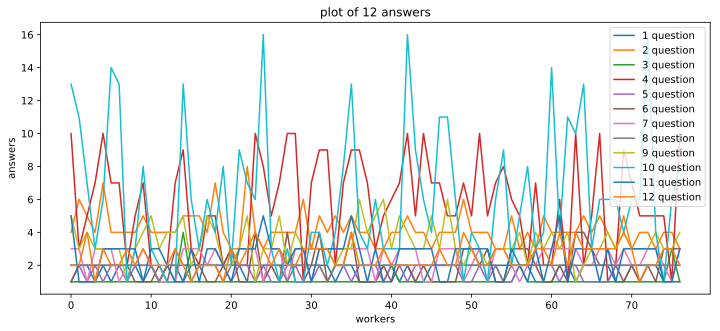

In [23]:
# Plot all the dataset through line
plt.figure(figsize=(12,5))
for i in range(0, 12):
    #plt.subplot(711)
    b = i + 1
    plt.plot(DaSH[:,i], label='%s question' % b)
plt.xlabel('workers')
plt.ylabel('answers')
plt.title('plot of 12 answers')
plt.legend()
plt.show()

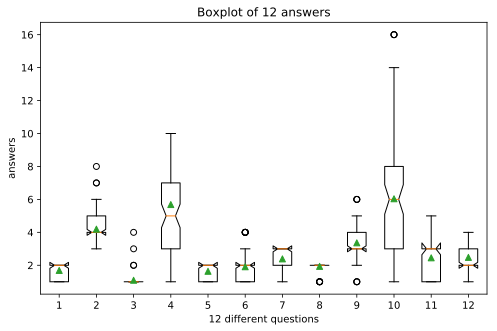

In [24]:
# Plot all the data of Boxplot
plt.figure(figsize=(8,5))
plt.boxplot(DaSH,showmeans=True,notch=True)
plt.xlabel('12 different questions')
plt.ylabel('answers')
plt.title('Boxplot of 12 answers')
plt.show()

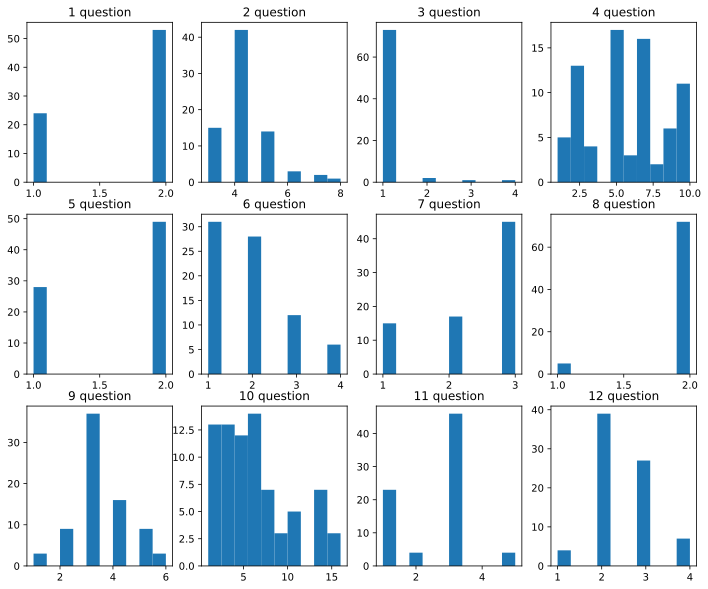

In [30]:
# Plot the histogram of the data
plt.figure(figsize=(12,10))
for i in range(0,12):
    plt.subplot(3, 4, i+1)
    plt.hist(DaSH[:,i])
    b = i+1
    plt.title('%s question' % b)
plt.show()

Question 1: almost double Male than Female
Question 2: 90% percent age from 18-44  more than 50% percent worker age from 25-34 years old
Question 3: more than 90% american
Question 4: first place: Sciene and technology second place: Service third: Business four: other field
Question 5: 38% free streaming video   62% paid streaming video
Question 6: extremely often/very ofen  in total  75% percent
Question 7: nearly 60% no difference use video streaming    (a little more) on weekends
Question 8: almost 95% use in evening
Question 9: nearly 50% spend 1-2 hours    mostly in 0.5-3 hours
Question 10: very differently distrubuted
Question 11: more than half relaxing, 28% surfing in the web
Question 12: TV 50%    Laptop  33%